<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/Flower_AI_baocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [28]:
trainset='/content/drive/MyDrive/Flower'

In [29]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 489 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [30]:
{'.ipynb_checkpoints': 0,
 'lotus': 1,
 'water lily': 2,
 'daisy': 3,
 'apricot': 4,
 'rose': 5}

{'.ipynb_checkpoints': 0,
 'lotus': 1,
 'water lily': 2,
 'daisy': 3,
 'apricot': 4,
 'rose': 5}

In [31]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
4/4 [==============================] - 87s 18s/step - loss: 11.2856 - accuracy: 0.2168 - val_loss: 1.5901 - val_accuracy: 0.1923
Epoch 2/50
4/4 [==============================] - 61s 16s/step - loss: 1.5532 - accuracy: 0.3865 - val_loss: 1.4310 - val_accuracy: 0.3462
Epoch 3/50
4/4 [==============================] - 62s 15s/step - loss: 1.2875 - accuracy: 0.4581 - val_loss: 1.1163 - val_accuracy: 0.5769
Epoch 4/50
4/4 [==============================] - 63s 16s/step - loss: 0.9940 - accuracy: 0.6115 - val_loss: 0.6241 - val_accuracy: 0.7692
Epoch 5/50
4/4 [==============================] - 60s 15s/step - loss: 0.6671 - accuracy: 0.6953 - val_loss: 0.3566 - val_accuracy: 0.9423
Epoch 6/50
4/4 [==============================] - 63s 15s/step - loss: 0.3003 - accuracy: 0.8937 - val_loss: 0.1581 - val_accuracy: 0.9423
Epoch 7/50
4/4 [==============================] - 60s 15s/step - loss: 0.2609 - accuracy: 0.9059 - val_loss: 0.0469 - val_accuracy: 0.9808
Epoch 8/50
4/4 [==========

In [33]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 489 images belonging to 5 classes.
Found 52 images belonging to 5 classes.


In [34]:
model.save('monan12.hs')

In [35]:
model1=load_model('monan12.hs')

In [41]:
label = ['Apricot','Lotus','Daisy','Rose','Waterlily']


1/1 [==============================] - 0s 88ms/step
Lotus


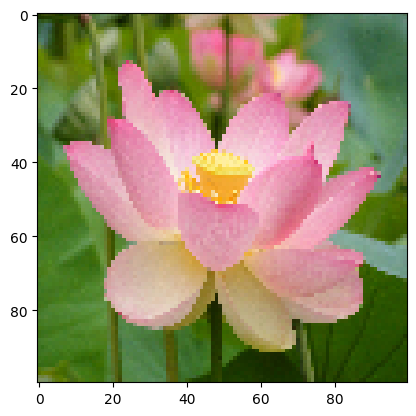

In [42]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Flower/Nelumno_nucifera_open_flower_-_botanic_garden_adelaide2.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 50ms/step
Rose


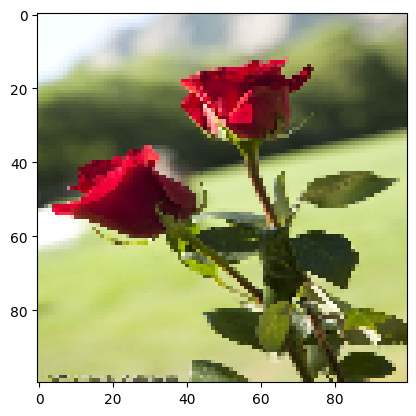

In [38]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Flower/e533b920a6e3befdb902ef7f62c9f30b.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 48ms/step
Apricot


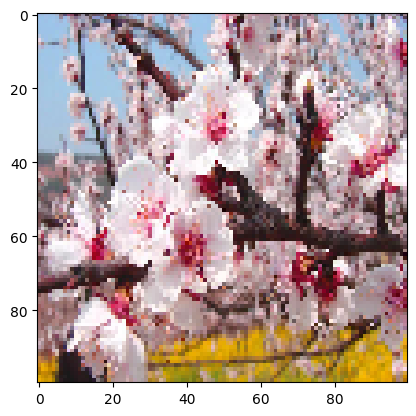

In [47]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Flower/27221fbe80dafdbb958f07a7539408ea.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])